In [ ]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()


Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx
Saving PCOS_infertility.csv to PCOS_infertility.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")

# Drop unnamed empty column
df.drop(columns=['Unnamed: 44'], inplace=True)

# Show basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Convert all object types to numeric (if applicable)
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Confirm no nulls
df.isnull().sum().sum()


np.int64(0)

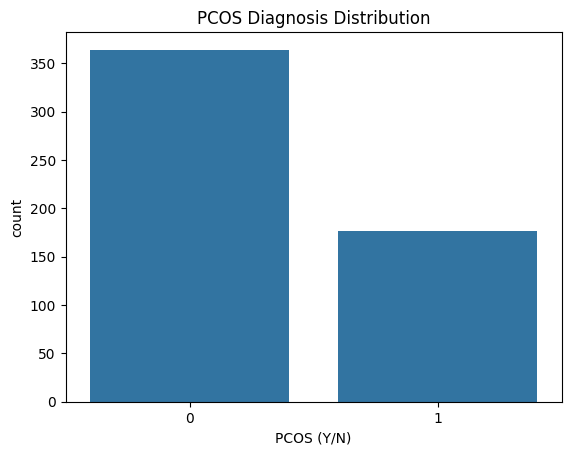

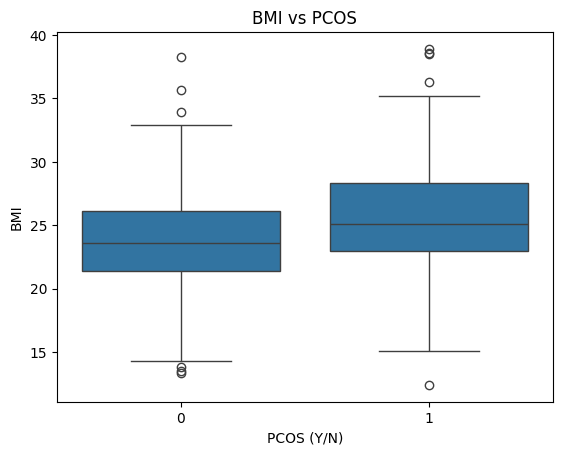

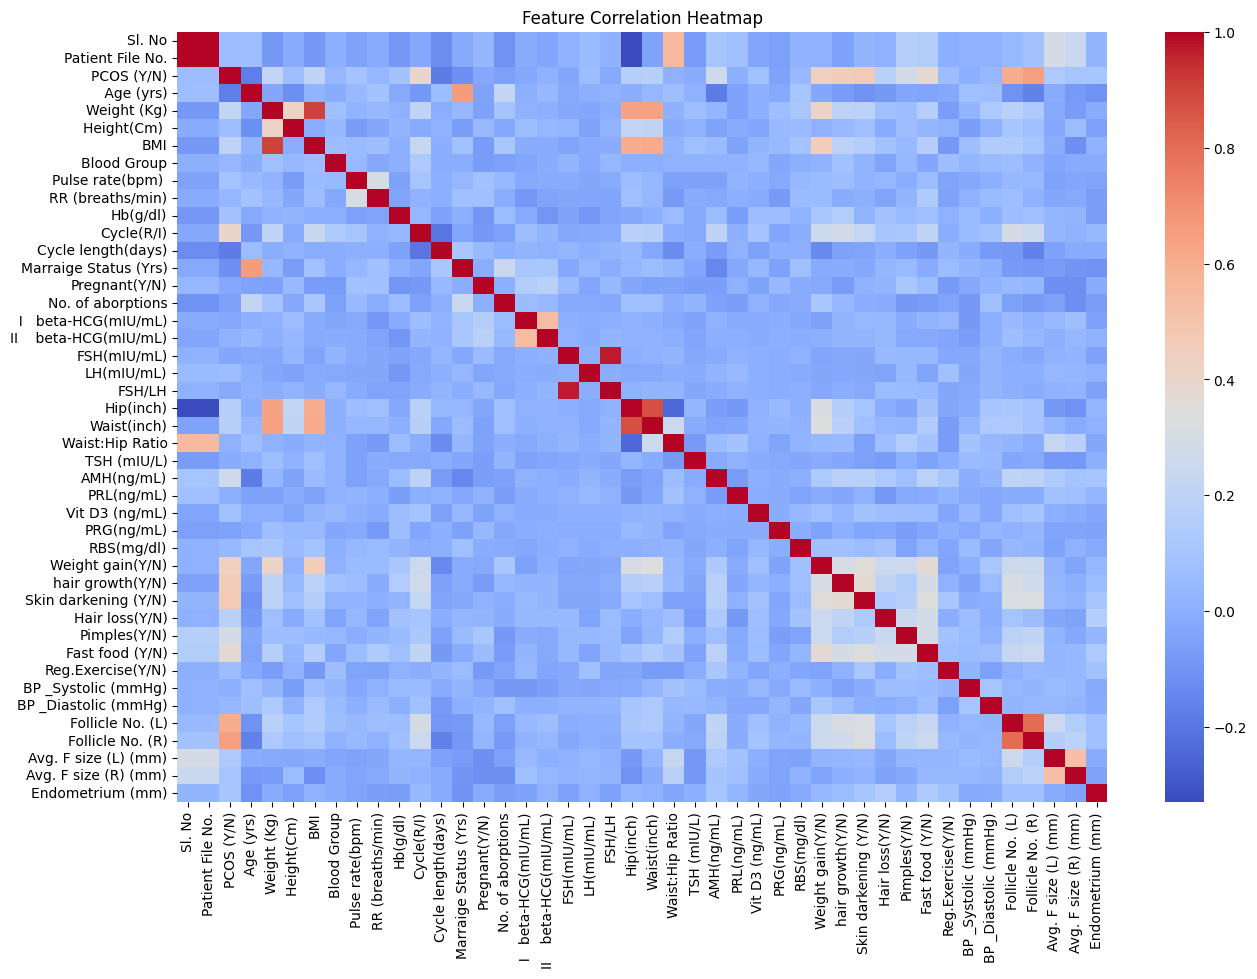

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

In [ ]:
# Distribution of PCOS Diagnosis
sns.countplot(x='PCOS (Y/N)', data=df)
plt.title("PCOS Diagnosis Distribution")
plt.show()

# Example: BMI comparison
sns.boxplot(x='PCOS (Y/N)', y='BMI', data=df)
plt.title("BMI vs PCOS")
plt.show()

# Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Correlation with PCOS
print(df.corr()['PCOS (Y/N)'].sort_values(ascending=False))


In [ ]:
# ✅ STEP 5: Feature Selection and Train-Test Split

# Use exact column names (check df.columns if needed)
features = ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)',
            'hair growth(Y/N)', 'Weight gain(Y/N)', 'BMI']

X = df[features]
y = df['PCOS (Y/N)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ✅ STEP 6: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# ✅ STEP 7: Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.908256880733945

🔹 Confusion Matrix:
 [[74  3]
 [ 7 25]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        77
           1       0.89      0.78      0.83        32

    accuracy                           0.91       109
   macro avg       0.90      0.87      0.89       109
weighted avg       0.91      0.91      0.91       109



In [ ]:
# ✅ STEP 8 (Optional): Try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


🌲 Random Forest Accuracy: 0.8990825688073395
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        77
           1       0.86      0.78      0.82        32

    accuracy                           0.90       109
   macro avg       0.89      0.86      0.87       109
weighted avg       0.90      0.90      0.90       109



In [ ]:
import joblib

# Assuming your model is called 'model'
joblib.dump(model, 'pcos_model.pkl')


['pcos_model.pkl']

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.download('pcos_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>